In [4]:
pip install matplotlib Seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../Dataset/Cleaned/combinedCleanedData_20240709_145255.csv')

print(df.head())




               Name      Joined  International Reputation  Height  \
0         L. Suárez  2020-09-25                       5.0  182.88   
1      K. De Bruyne  2015-08-30                       4.0  180.34   
2   Bruno Fernandes  2020-01-30                       2.0  177.80   
3      A. Griezmann  2019-07-12                       4.0  175.26   
4          M. Acuña  2020-09-14                       2.0  172.72   

   Release Clause  Potential     Weight       Work Rate      Wage  \
0      64600000.0         87  86.182480    High/ Medium  115000.0   
1     161000000.0         91  69.853168      High/ High  370000.0   
2     124400000.0         90  68.945984      High/ High  195000.0   
3     103500000.0         87  73.028312  Medium/ Medium  290000.0   
4      46200000.0         83  68.945984      High/ High   41000.0   

                Club  ...       Value  Nationality Skill Moves  \
0    Atlético Madrid  ...  31500000.0      Uruguay         3.0   
1    Manchester City  ...  87000000.0 

In [6]:
# Function to check for missing values
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"Remaining missing values in {name} Data:")
        print(missing)
    else:
        print(f"No missing values in {name} Data.")

# Check for missing values
check_missing_values(df, "Combined")


Remaining missing values in Combined Data:
Contract Valid Until    2748
dtype: int64


In [7]:
# Function to check data types
def check_data_types(df):
    print("Data types:")
    print(df.dtypes)
    print("\n")

# Check data types
check_data_types(df)


Data types:
Name                         object
Joined                       object
International Reputation    float64
Height                      float64
Release Clause              float64
Potential                     int64
Weight                      float64
Work Rate                    object
Wage                        float64
Club                         object
ID                            int64
Value                       float64
Nationality                  object
Skill Moves                 float64
Contract Valid Until         object
Overall                       int64
Weak Foot                   float64
Age                           int64
Best Overall Rating         float64
Position                     object
Preferred Foot               object
dtype: object




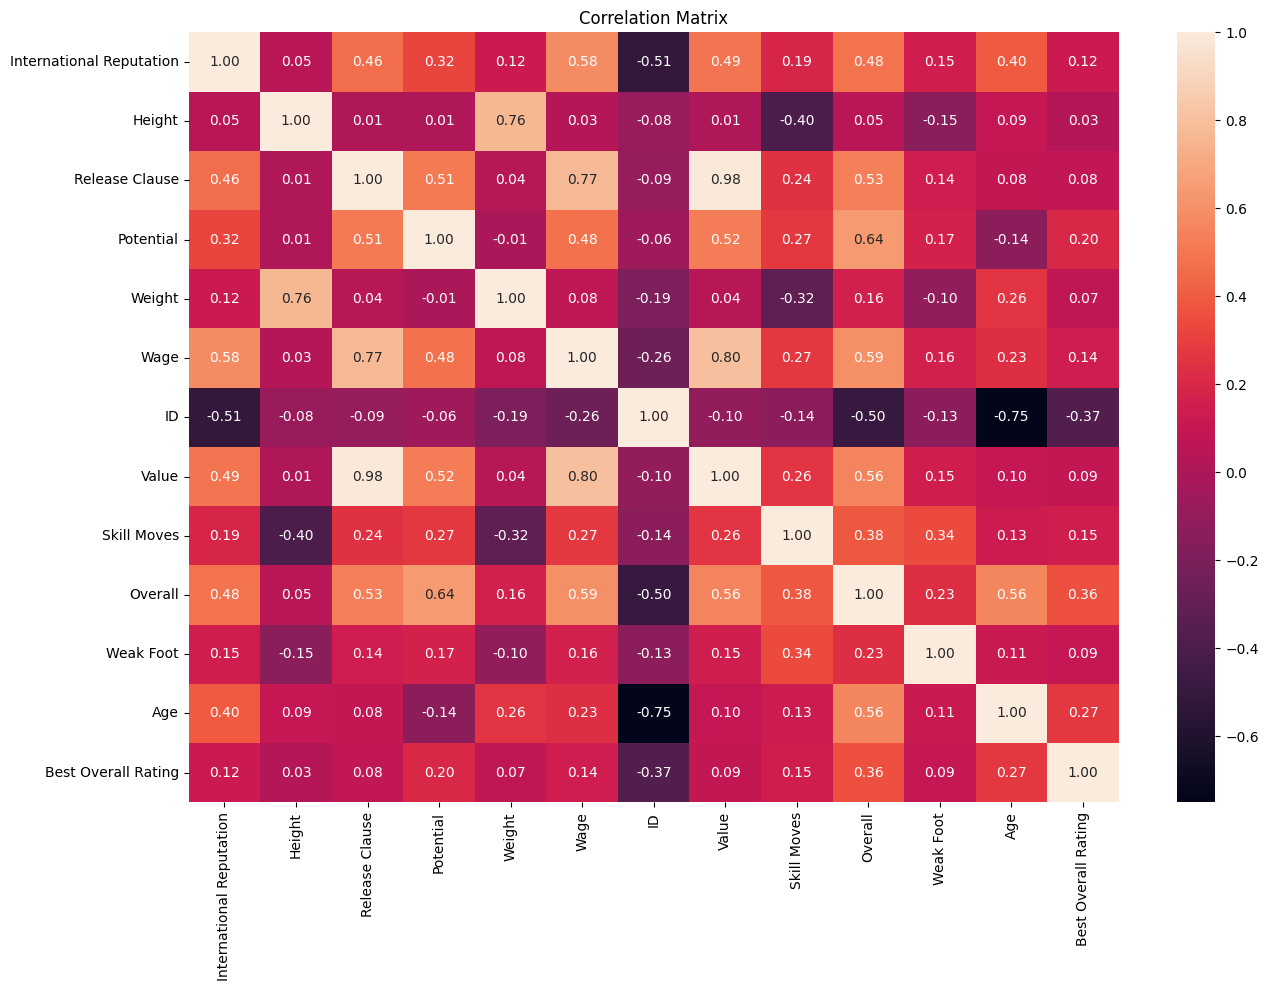

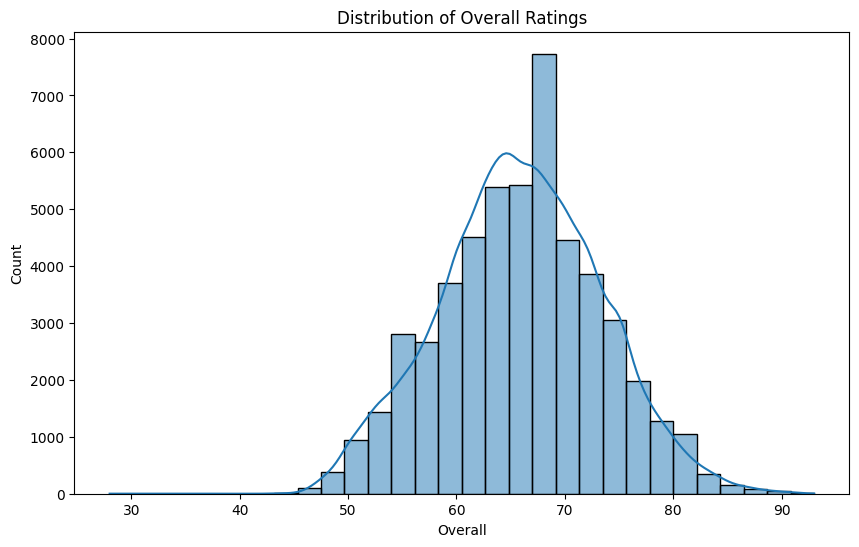

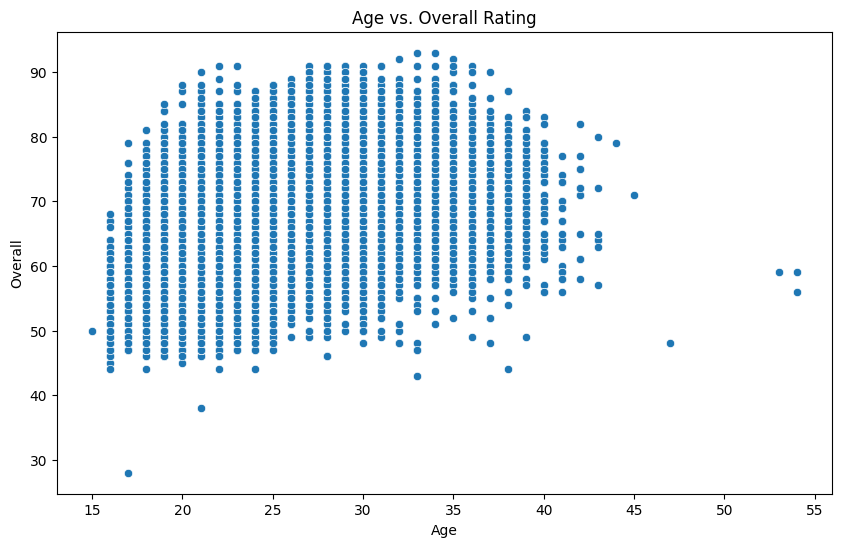

In [8]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of Overall ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Overall'], bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()

# Scatter plot for Age vs. Overall
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Overall', data=df)
plt.title('Age vs. Overall Rating')
plt.show()

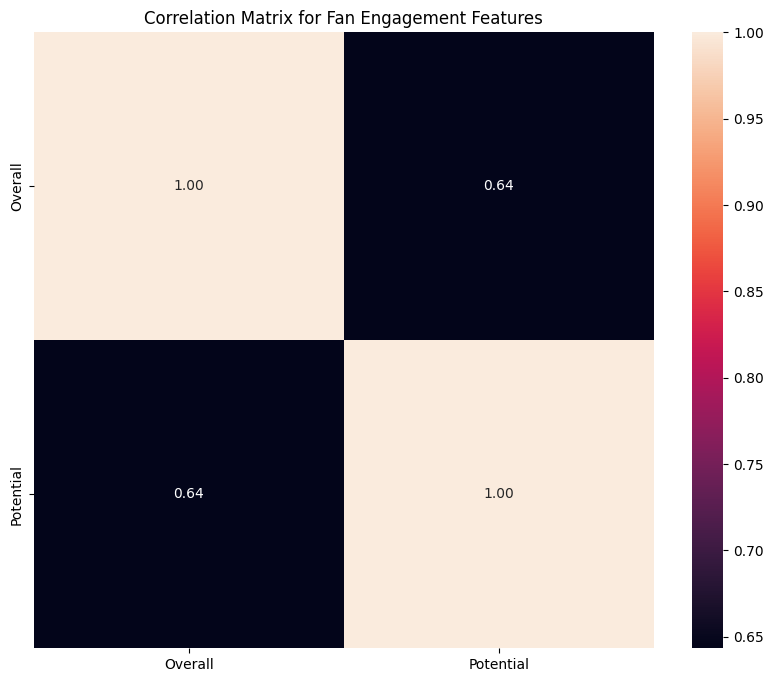

In [10]:
# Example features for predicting fan engagement and merchandise sales
features_fan_engagement = ['Overall', 'Potential']
# Assuming a 'Merchandise_Sales' column exists in the dataset
X_fan_engagement = df[features_fan_engagement]

def plot_correlation_matrix(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_fan_engagement, 'Correlation Matrix for Fan Engagement Features')


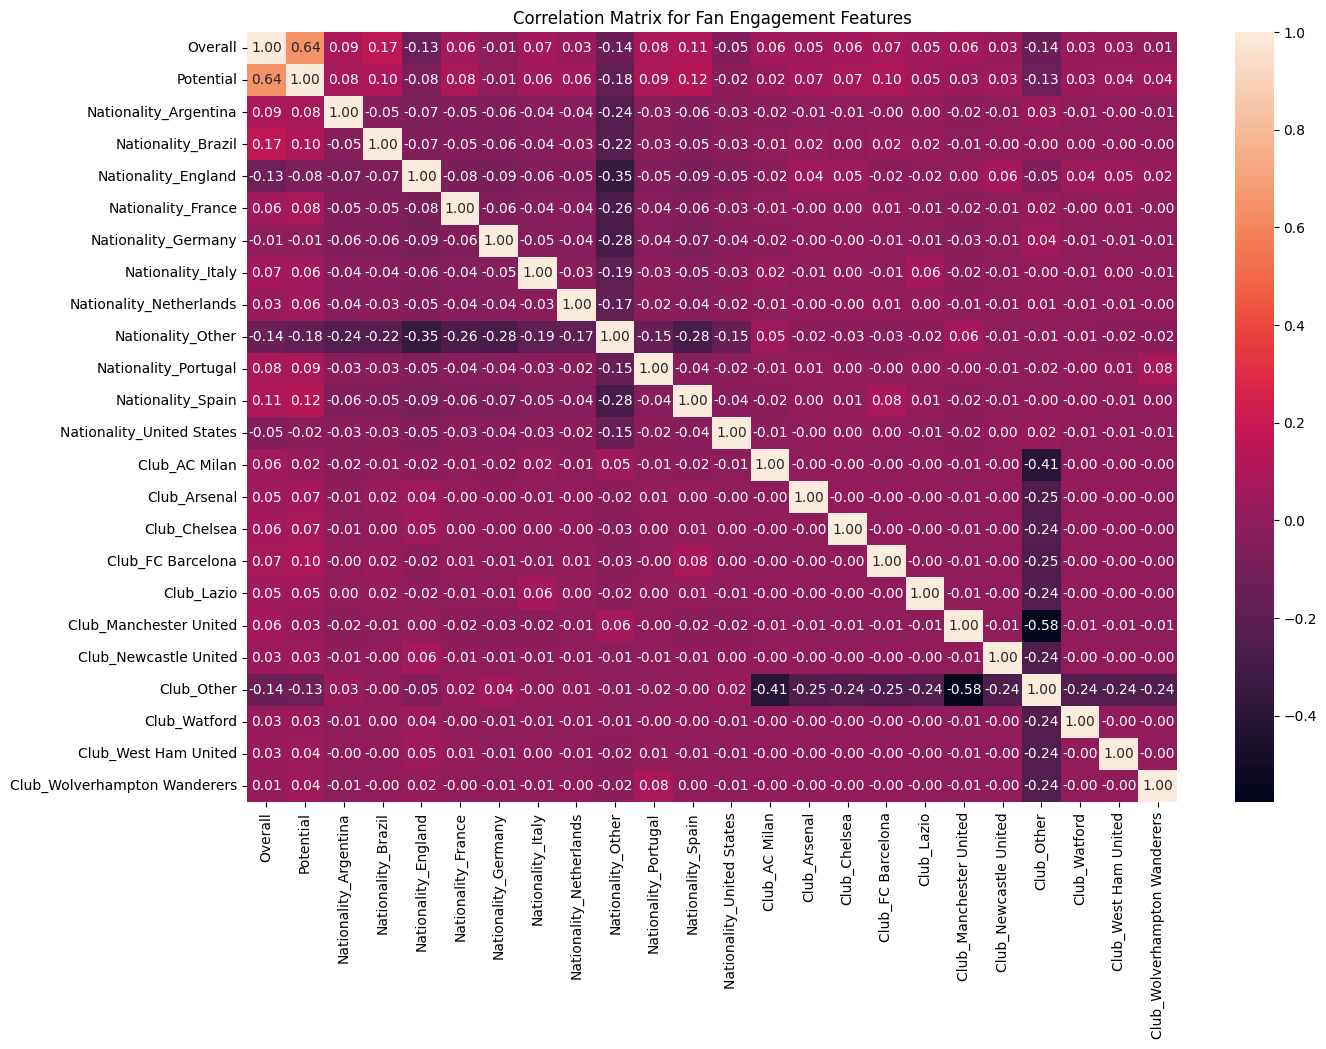

In [11]:
# Example features for predicting fan engagement and merchandise sales
features_fan_engagement = ['Overall', 'Potential', 'Nationality', 'Club']
# Limit to top N categories for Nationality and Club
top_n_nationalities = df['Nationality'].value_counts().index[:10]
top_n_clubs = df['Club'].value_counts().index[:10]

df['Nationality'] = df['Nationality'].apply(lambda x: x if x in top_n_nationalities else 'Other')
df['Club'] = df['Club'].apply(lambda x: x if x in top_n_clubs else 'Other')

# One-hot encode categorical variables
X_fan_engagement = pd.get_dummies(df[features_fan_engagement])

def plot_correlation_matrix(data, title):
    plt.figure(figsize=(15,10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_fan_engagement, 'Correlation Matrix for Fan Engagement Features')

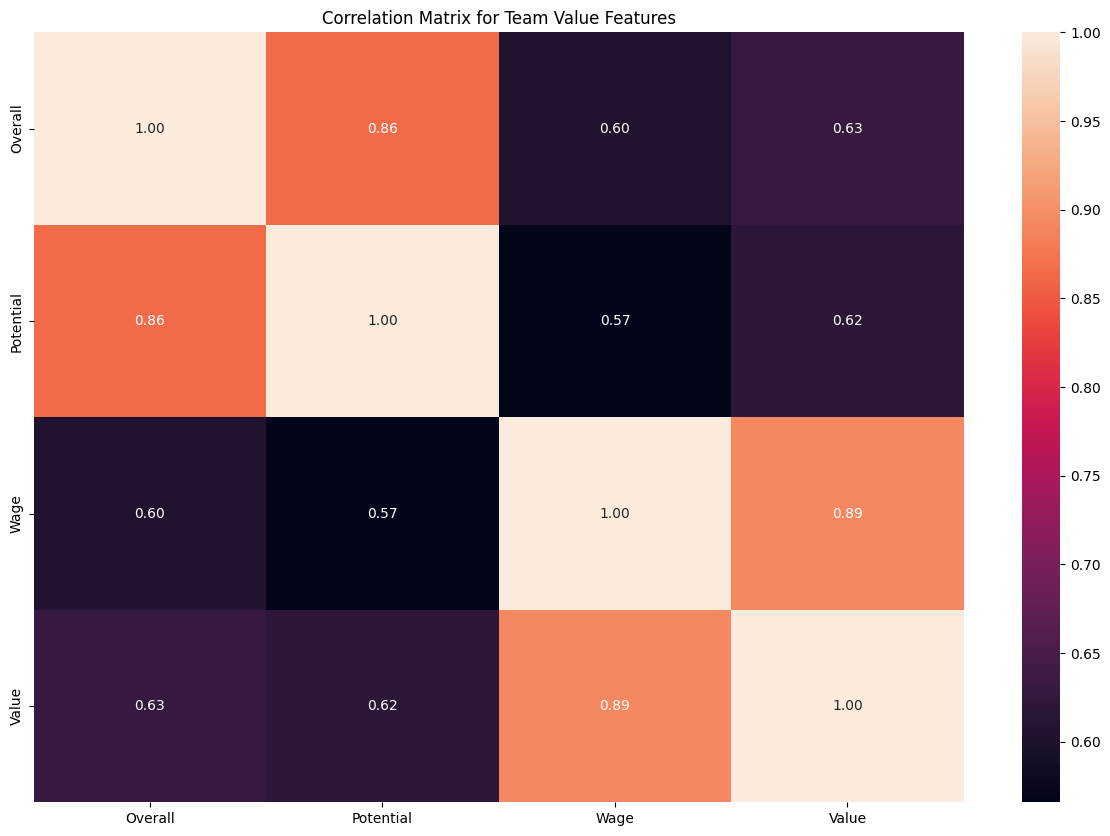

In [14]:
# Example features for predicting team value
features_team_value = ['Overall', 'Potential', 'Wage', 'Value']
X_team_value = df[features_team_value].groupby(df['Club']).mean()

plot_correlation_matrix(X_team_value, 'Correlation Matrix for Team Value Features')


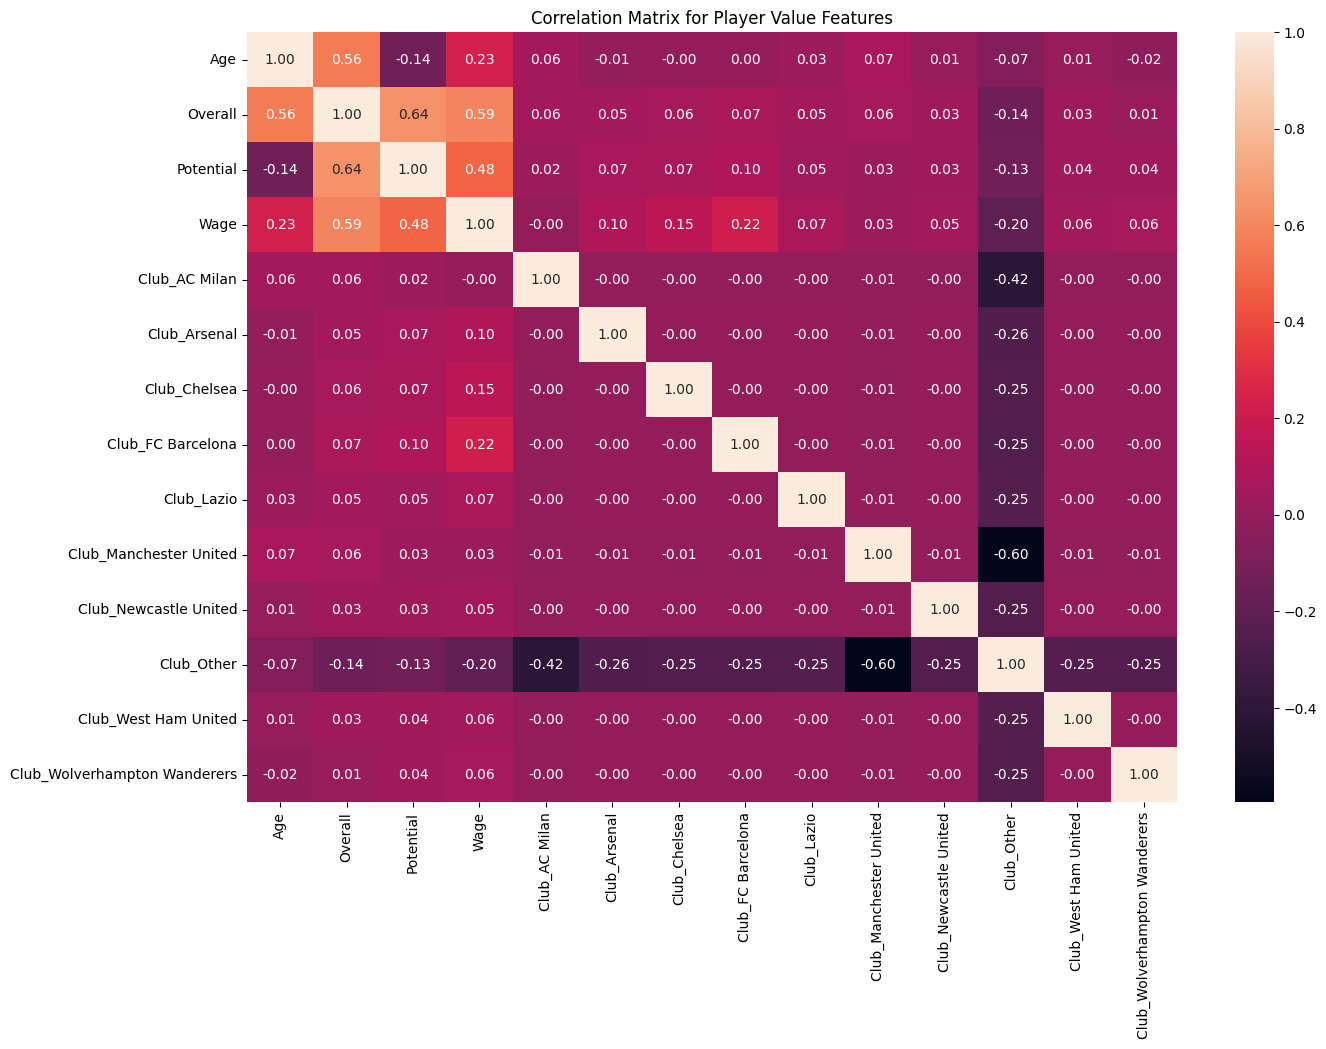

In [19]:
# Example features for predicting player value
features_player_value = ['Age', 'Overall', 'Potential', 'Club', 'Wage']

# Limit the number of unique clubs for faster processing
top_clubs = df['Club'].value_counts().index[:10]
df['Club'] = df['Club'].apply(lambda x: x if x in top_clubs else 'Other')

# One-hot encode the Club feature
X_player_value = pd.get_dummies(df[features_player_value])

# Plot correlation matrix
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(15,10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title(title)
    plt.show()

plot_correlation_matrix(X_player_value, 'Correlation Matrix for Player Value Features')

######

PLAYER VALUE STARTS HERE

Predicting player values from here

In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


found an outlier here

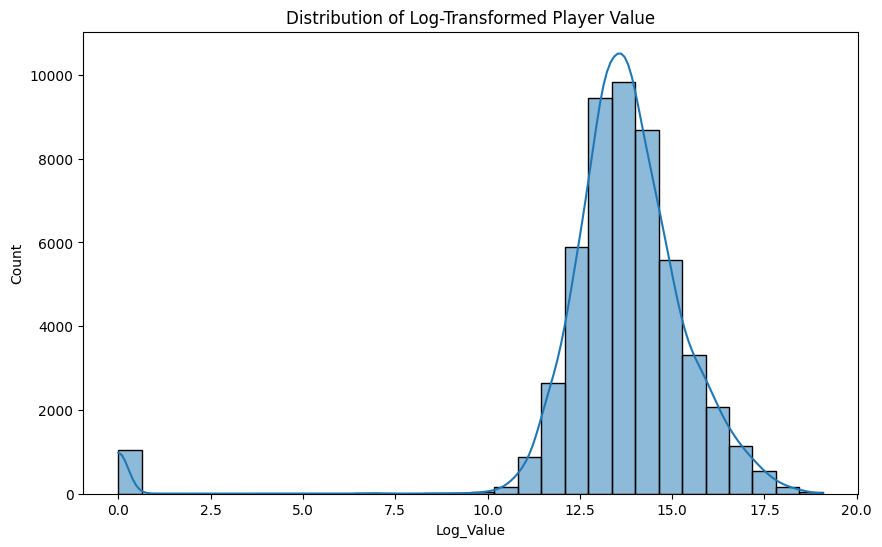

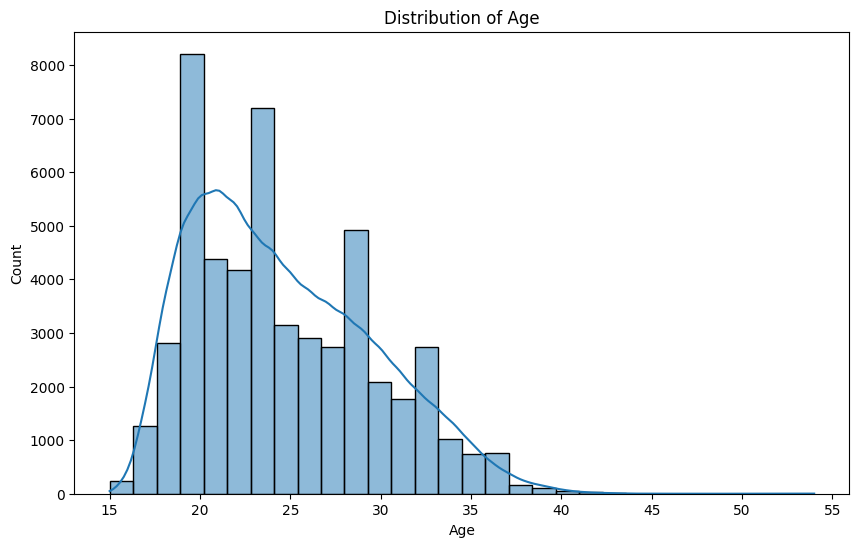

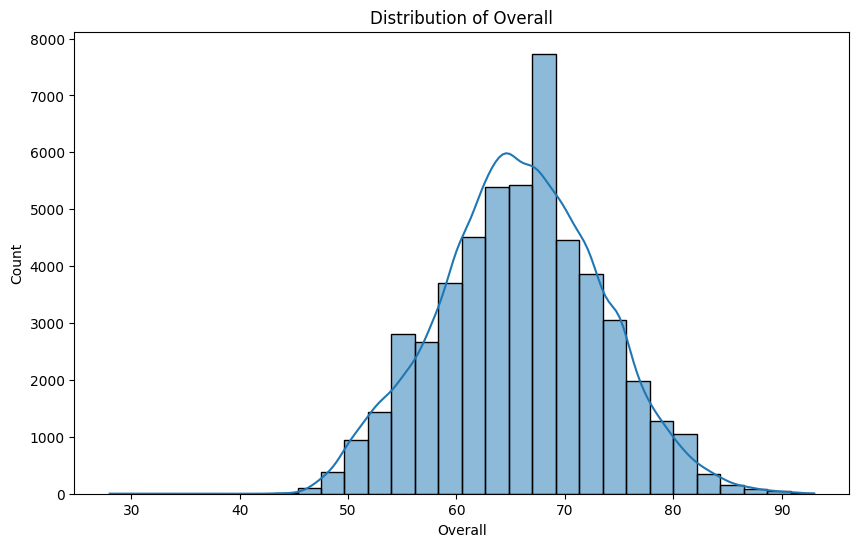

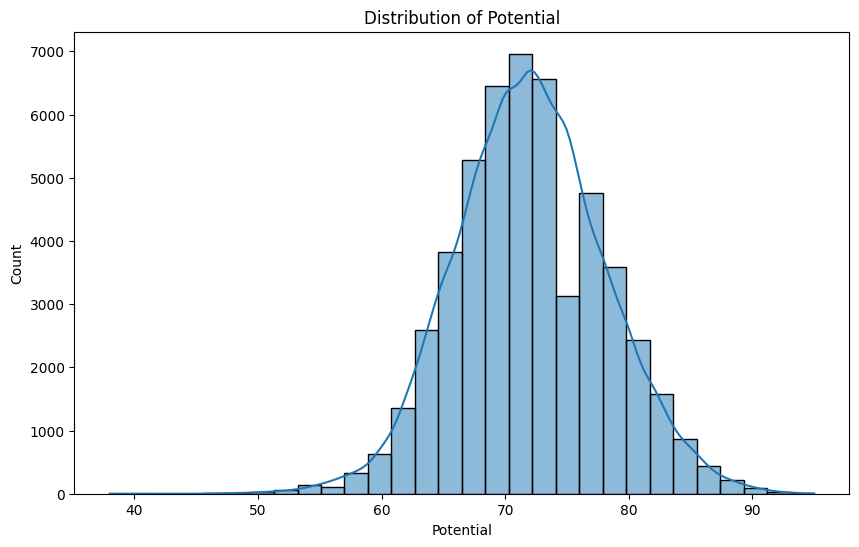

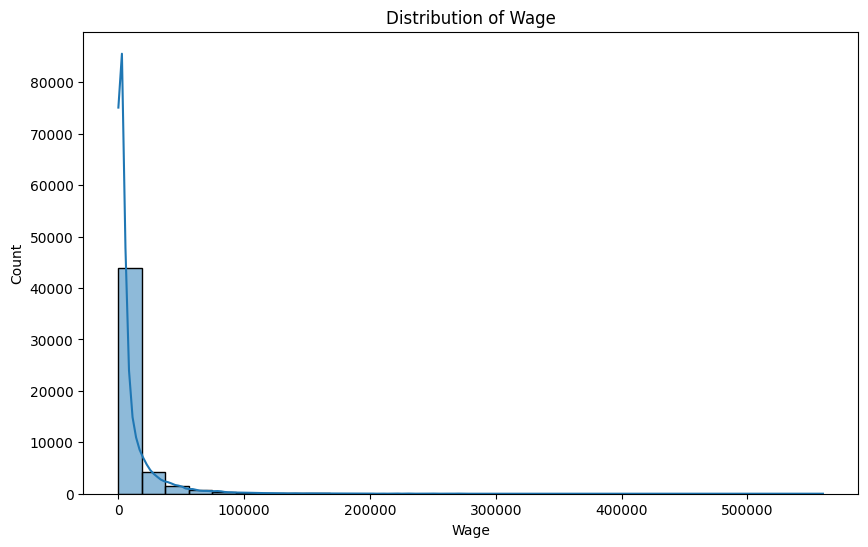

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the log-transformed target variable
plt.figure(figsize=(10,6))
sns.histplot(df['Log_Value'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Player Value')
plt.show()

# Visualize key features
features_to_visualize = ['Age', 'Overall', 'Potential', 'Wage']
for feature in features_to_visualize:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


removed the outlier here

/var/folders/7t/m9mwq9ks5kz_9yfr34qc2hdr0000gn/T/ipykernel_21089/745194998.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Value'] = np.log1p(df['Value'])


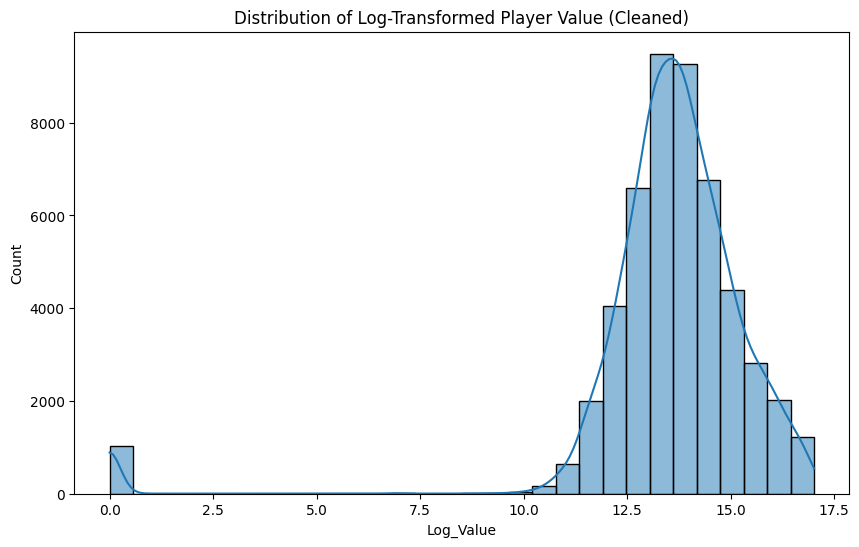

In [18]:
# Define a function to remove extreme outliers
def remove_extreme_outliers(df, column, z_thresh=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    df = df[(df[column] >= mean - z_thresh * std) & (df[column] <= mean + z_thresh * std)]
    return df


# Remove extreme outliers from the Value column
df = remove_extreme_outliers(df, 'Value')
df['Log_Value'] = np.log1p(df['Value'])

# Visualize the cleaned data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Value'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Player Value (Cleaned)')
plt.show()


went through with random forest model

                         Feature  Importance
3                           Wage    0.633696
1                        Overall    0.236994
2                      Potential    0.056441
0                            Age    0.043447
397    Club_FC Anzhi Makhachkala    0.002099
403           Club_FC Basel 1893    0.001475
583           Club_Internacional    0.001244
401            Club_FC Barcelona    0.001201
902  Club_San Lorenzo de Almagro    0.000838
701         Club_Montreal Impact    0.000800


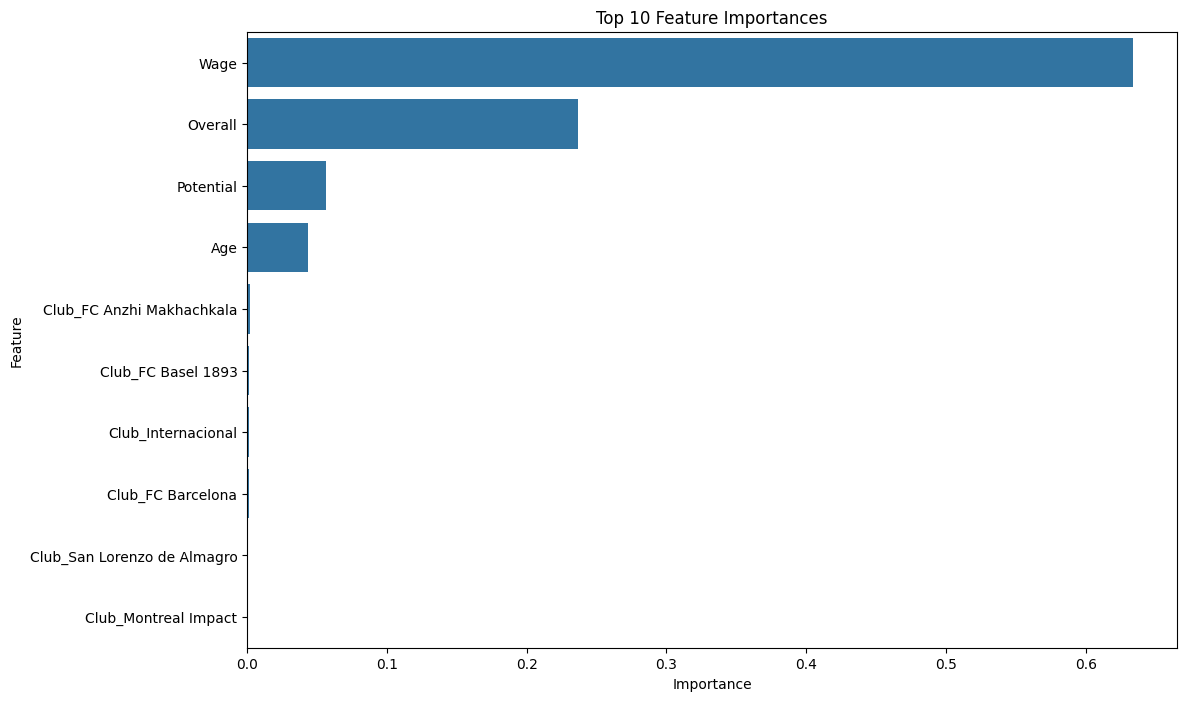

In [20]:
# Fit a Random Forest model to inspect feature importance quickly
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train_player, y_train_player)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_player_value.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))  # Show top 10 features

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


built our model with linear regression and xgboost

In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare the data again using important features
features_player_value = ['Age', 'Overall', 'Potential', 'Wage']
X_player_value = df[features_player_value]
y_player_value = df['Log_Value']

# Split data into training and testing sets
X_train_player, X_test_player, y_train_player, y_test_player = train_test_split(X_player_value, y_player_value, test_size=0.2, random_state=42)

# Function to create a pipeline with robust scaling
def create_robust_pipeline(model):
    return Pipeline([
        ('scaler', RobustScaler()),
        ('model', model)
    ])

# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Linear Regression Model
lr_player_pipeline = create_robust_pipeline(LinearRegression())
mse_lr_player = evaluate_model(lr_player_pipeline, X_train_player, y_train_player, X_test_player, y_test_player)
print(f"Linear Regression MSE (Log Player Value): {mse_lr_player}")

# XGBoost Model
xgb_player_pipeline = create_robust_pipeline(XGBRegressor(random_state=42))
mse_xgb_player = evaluate_model(xgb_player_pipeline, X_train_player, y_train_player, X_test_player, y_test_player)
print(f"XGBoost MSE (Log Player Value): {mse_xgb_player}")


Linear Regression MSE (Log Player Value): 3.653950406228708
XGBoost MSE (Log Player Value): 0.18115715937629912


PLAYER VALUE ENDS HERE

######

TEAM VALUE STARTS HERE

In [22]:
# Aggregate data by team
team_df = df.groupby('Club').agg({
    'Value': 'mean',
    'Overall': 'mean',
    'Wage': 'sum',
    'Age': 'mean'
}).reset_index()

# Rename columns for clarity
team_df.rename(columns={
    'Value': 'Avg_Player_Value',
    'Overall': 'Avg_Overall',
    'Wage': 'Total_Wage',
    'Age': 'Avg_Age'
}, inplace=True)

print(team_df.head())


                    Club  Avg_Player_Value  Avg_Overall  Total_Wage    Avg_Age
0  1. FC Heidenheim 1846      1.348841e+06    65.536232    543500.0  23.739130
1   1. FC Kaiserslautern      7.371233e+05    63.315068    166350.0  24.643836
2             1. FC Köln      3.613722e+06    69.422222   1274550.0  24.288889
3        1. FC Magdeburg      6.844915e+05    62.288136    101150.0  22.983051
4         1. FC Nürnberg      1.363974e+06    65.961538    407700.0  24.474359


what i first got which was very high

In [23]:
# Define features and target
features_team_value = ['Avg_Player_Value', 'Avg_Overall', 'Total_Wage', 'Avg_Age']
X_team_value = team_df[features_team_value]
y_team_value = df.groupby('Club')['Value'].sum()

# Split data
X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team_value, y_team_value, test_size=0.2, random_state=42)

# Linear Regression Model
lr_team_pipeline = create_robust_pipeline(LinearRegression())
mse_lr_team = evaluate_model(lr_team_pipeline, X_train_team, y_train_team, X_test_team, y_test_team)
print(f"Linear Regression MSE (Team Value): {mse_lr_team}")

# XGBoost Model
xgb_team_pipeline = create_robust_pipeline(XGBRegressor(random_state=42))
mse_xgb_team = evaluate_model(xgb_team_pipeline, X_train_team, y_train_team, X_test_team, y_test_team)
print(f"XGBoost MSE (Team Value): {mse_xgb_team}")


Linear Regression MSE (Team Value): 2249015253580658.5
XGBoost MSE (Team Value): 2336012484376351.5


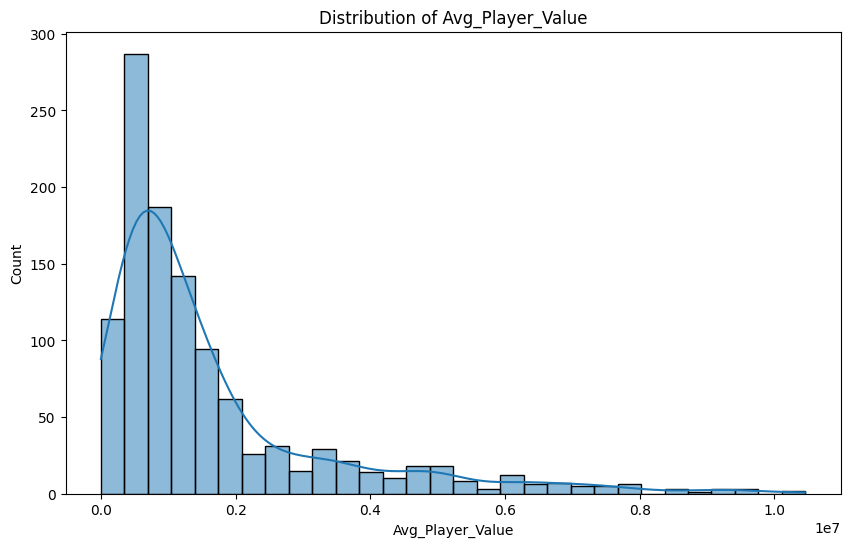

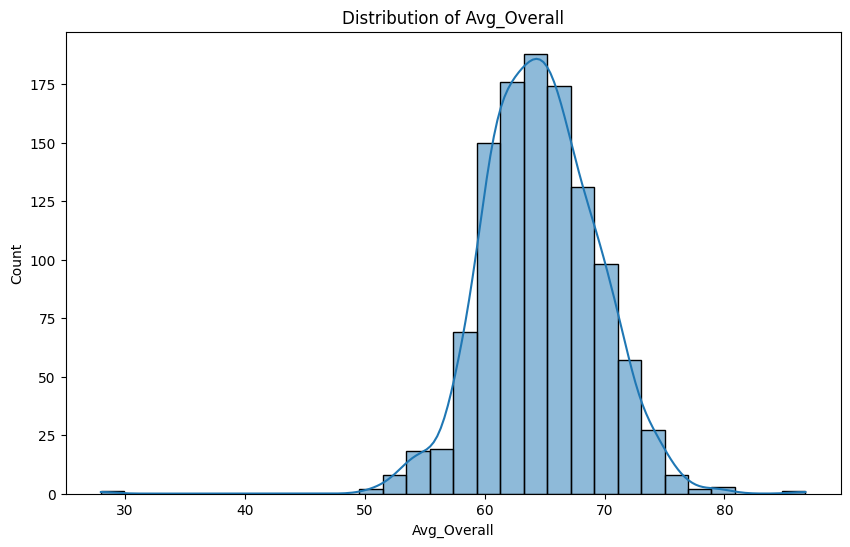

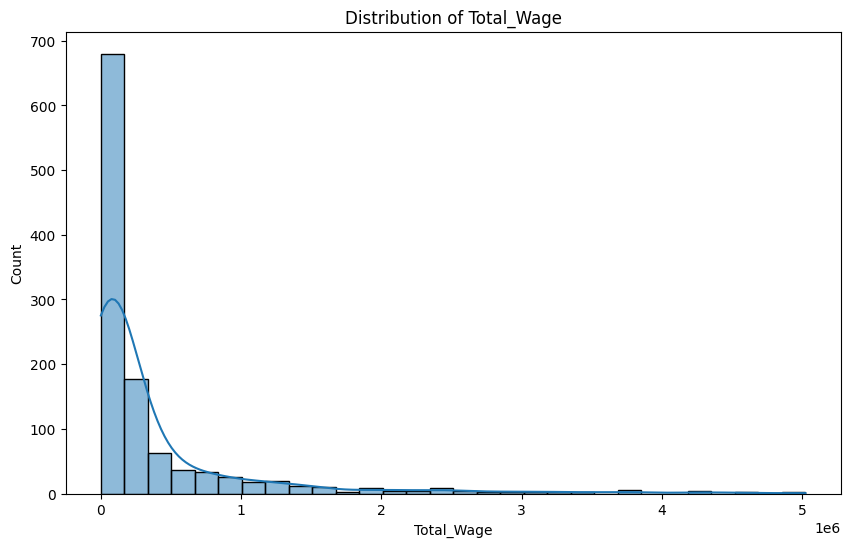

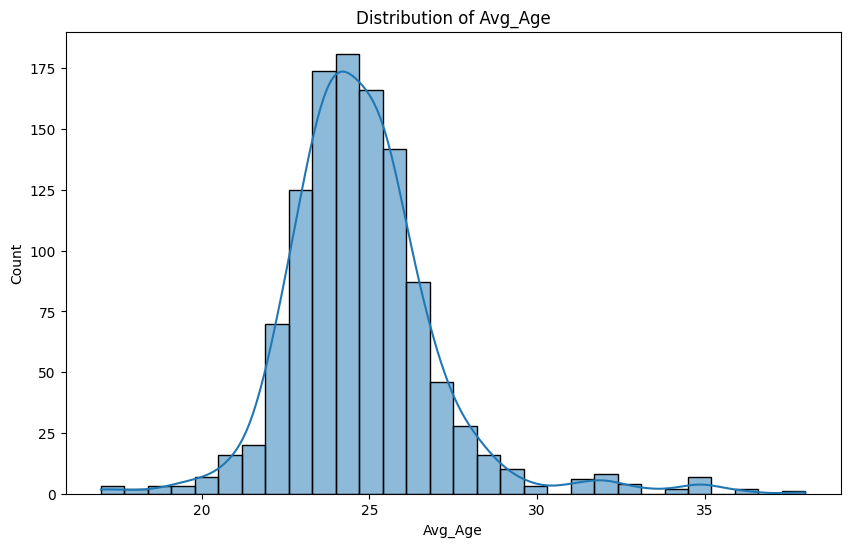

In [24]:
import seaborn as sns

# Plot distribution of key features
for feature in features_team_value:
    plt.figure(figsize=(10, 6))
    sns.histplot(team_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply log transformation to skewed features
team_df['Log_Avg_Player_Value'] = np.log1p(team_df['Avg_Player_Value'])
team_df['Log_Avg_Overall'] = np.log1p(team_df['Avg_Overall'])
team_df['Log_Total_Wage'] = np.log1p(team_df['Total_Wage'])

# Select features for team value prediction
features_team_value = ['Log_Avg_Player_Value', 'Log_Avg_Overall', 'Log_Total_Wage', 'Avg_Age']
X_team_value = team_df[features_team_value]

# Group target variable (team value) by club
y_team_value = df.groupby('Club')['Value'].sum()

# Split the data into training and testing sets
X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team_value, y_team_value, test_size=0.2, random_state=42)

# Ensure proper scaling
scaler = StandardScaler()
X_train_team = scaler.fit_transform(X_train_team)
X_test_team = scaler.transform(X_test_team)


In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Create a robust pipeline with StandardScaler
def create_standard_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define base models including Linear Regression, Ridge, Lasso, and XGBoost
base_models = [
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('xgb', XGBRegressor(random_state=42))
]

# Define stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=GradientBoostingRegressor(random_state=42))

# Evaluate the stacking model
mse_stacking = evaluate_model(stacking_model, X_train_team, y_train_team, X_test_team, y_test_team)
print(f"Stacking Model MSE (Team Value): {mse_stacking}")


Stacking Model MSE (Team Value): 2663239235703988.0


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_team_value = poly.fit_transform(X_team_value)

# Split data into training and testing sets with polynomial features
X_train_poly, X_test_poly, y_train_team, y_test_team = train_test_split(X_poly_team_value, y_team_value, test_size=0.2, random_state=42)


Model Training:

We used several models to predict team value:
Linear Regression: A basic model to predict team value.
XGBoost: A more advanced model that handles complex relationships.
Ridge and Lasso Regression: Variants of linear regression that try to improve predictions by reducing complexity.
LightGBM: Another advanced model, for which we tuned hyperparameters to get the best performance.
Model Stacking: Combining several models to improve prediction accuracy.
so we stacked below 



Model Evaluation:

We evaluated the performance of each model by looking at the Mean Squared Error (MSE). Lower MSE means better predictions.
The best-performing model was LightGBM after hyperparameter tuning.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Define parameter grid for LightGBM with correct parameter names
param_grid = {
    'model__num_leaves': [31, 50],
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1, 10]
}

# Create LightGBM pipeline
lgb_pipeline = create_standard_pipeline(lgb.LGBMRegressor(random_state=42))

# Perform randomized search
random_search = RandomizedSearchCV(lgb_pipeline, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train_team, y_train_team)

# Best parameters and corresponding MSE
best_params = random_search.best_params_
best_mse = -random_search.best_score_

print(f"Best parameters for LightGBM: {best_params}")
print(f"Best MSE for LightGBM: {best_mse}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 603, number of used features: 4
[LightGBM] [Info] Start training from score 93206842.786070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 603, number of used features: 4
[LightGBM] [Info] Start training from score 93206842.786070
[LightGBM] [Info] Aut

Feature Importance
Most Important Features: Average player value, average overall rating, total wage, average age.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 4
[LightGBM] [Info] Start training from score 96248094.125967


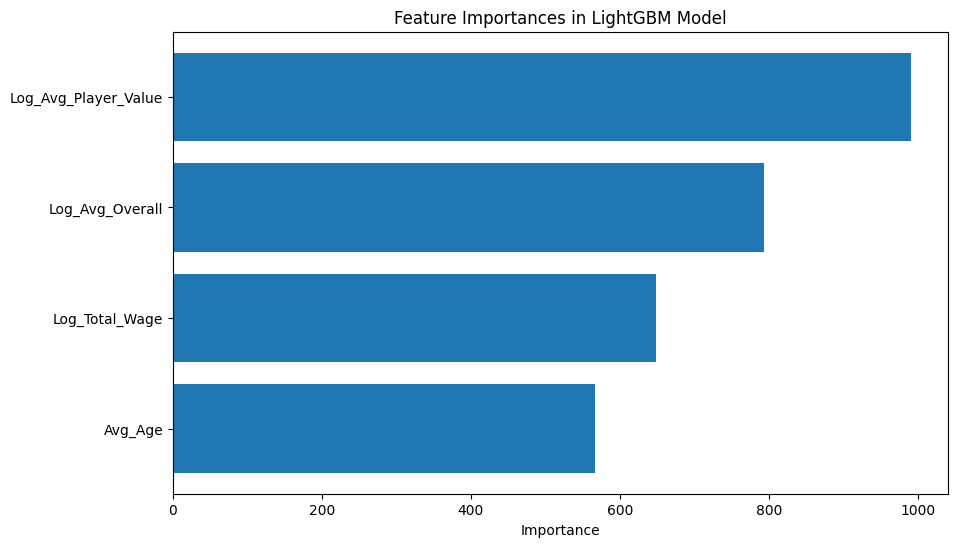

In [47]:
import matplotlib.pyplot as plt

# Fit the LightGBM model with the best parameters
best_lgbm_model = lgb.LGBMRegressor(
    num_leaves=31,
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42
)

best_lgbm_model.fit(X_train_team, y_train_team)

# Get feature importances
feature_importances = best_lgbm_model.feature_importances_
feature_names = features_team_value
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in LightGBM Model')
plt.gca().invert_yaxis()
plt.show()


cross validating our model

In [48]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(best_lgbm_model, X_team_value, y_team_value, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean()}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 4
[LightGBM] [Info] Start training from score 92332720.450829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 4
[LightGBM] [Info] Start training from score 97753790.117127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 4
[LightGBM] [Info] Star

refined the model below to use xg boost , knn , linear

                    Club  Avg_Player_Value  Avg_Overall  Total_Wage    Avg_Age
0  1. FC Heidenheim 1846      1.348841e+06    65.536232    543500.0  23.739130
1   1. FC Kaiserslautern      7.371233e+05    63.315068    166350.0  24.643836
2             1. FC Köln      3.613722e+06    69.422222   1274550.0  24.288889
3        1. FC Magdeburg      6.844915e+05    62.288136    101150.0  22.983051
4         1. FC Nürnberg      1.363974e+06    65.961538    407700.0  24.474359
Linear Regression MSE: 4.923641332711204e+16
Ridge MSE: 4.9217658033556664e+16
Lasso MSE: 4.9236413288406456e+16
XGBoost MSE: 3278350450050452.5
KNN MSE: 6163524414350308.0
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best MSE for XGBoost: 1.3390561174048132e+16
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best MSE for KNN: 1.5824544878210372e+16
Cross-validation MSE for XGBoost: 1.5251566074096396e+16
Cross-validation MSE for KNN: 1.2936764643441096e+16


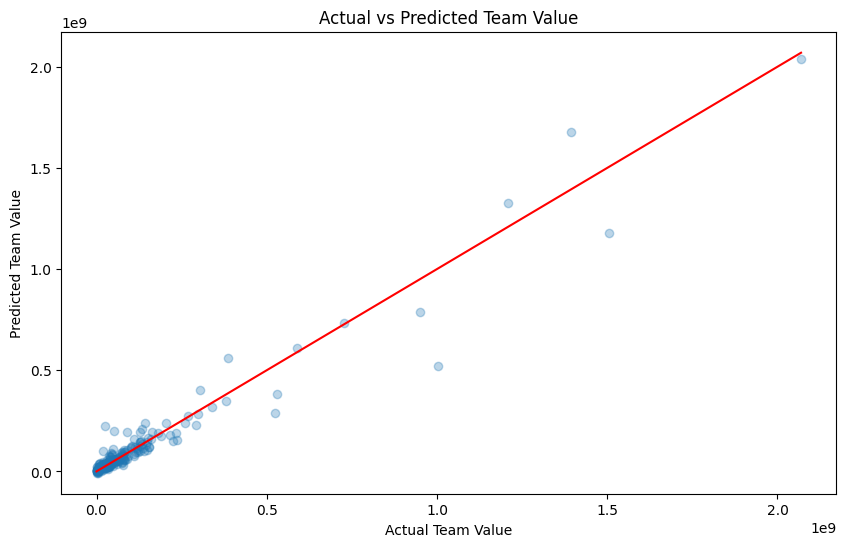

In [86]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is already defined and contains the necessary data

# Aggregate data by team
team_df = df.groupby('Club').agg({
    'Value': 'mean',
    'Overall': 'mean',
    'Wage': 'sum',
    'Age': 'mean'
}).reset_index()

# Rename columns for clarity
team_df.rename(columns={
    'Value': 'Avg_Player_Value',
    'Overall': 'Avg_Overall',
    'Wage': 'Total_Wage',
    'Age': 'Avg_Age'
}, inplace=True)

print(team_df.head())

# Apply log transformation to skewed features
team_df['Log_Avg_Player_Value'] = np.log1p(team_df['Avg_Player_Value'])
team_df['Log_Avg_Overall'] = np.log1p(team_df['Avg_Overall'])
team_df['Log_Total_Wage'] = np.log1p(team_df['Total_Wage'])

# Select features for team value prediction
features_team_value = ['Log_Avg_Player_Value', 'Log_Avg_Overall', 'Log_Total_Wage', 'Avg_Age']
X_team_value = team_df[features_team_value]

# Group target variable (team value) by club
y_team_value = df.groupby('Club')['Value'].sum().reset_index(drop=True)

# Split the data into training and testing sets
X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team_value, y_team_value, test_size=0.2, random_state=42)

# Standard Scaler
scaler = StandardScaler()
X_train_team = scaler.fit_transform(X_train_team)
X_test_team = scaler.transform(X_test_team)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost': XGBRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

# Evaluate models
for name, model in models.items():
    mse = evaluate_model(model, X_train_team, y_train_team, X_test_team, y_test_team)
    print(f"{name} MSE: {mse}")

# Hyperparameter Tuning for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_team, y_train_team)

best_params_xgb = grid_search_xgb.best_params_
best_mse_xgb = -grid_search_xgb.best_score_

print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best MSE for XGBoost: {best_mse_xgb}")

# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_team, y_train_team)

best_params_knn = grid_search_knn.best_params_
best_mse_knn = -grid_search_knn.best_score_

print(f"Best parameters for KNN: {best_params_knn}")
print(f"Best MSE for KNN: {best_mse_knn}")

# Cross-validation
cv_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_team_value, y_team_value, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE for XGBoost: {-cv_scores_xgb.mean()}")

cv_scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_team_value, y_team_value, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE for KNN: {-cv_scores_knn.mean()}")

# Plot Actual vs Predicted for the best model (e.g., XGBoost)
predictions_team_value = grid_search_xgb.best_estimator_.predict(X_test_team)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_team, predictions_team_value, alpha=0.3)
plt.plot([min(y_test_team), max(y_test_team)], [min(y_test_team), max(y_test_team)], color='red')
plt.xlabel('Actual Team Value')
plt.ylabel('Predicted Team Value')
plt.title('Actual vs Predicted Team Value')
plt.show()


######

TEAM VALUE ENDS HERE

######

In [ ]:
FAN ENGAGEMENT STARTS HERE

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline



# Select features for fan engagement prediction
features_fan_engagement = ['Overall', 'Potential', 'Nationality', 'Club', 'Skill Moves', 'Age']
X_fan_engagement = df[features_fan_engagement]

# Convert categorical features to numerical using one-hot encoding
X_fan_engagement = pd.get_dummies(X_fan_engagement)

# Assuming we have a target variable 'Merchandise_Sales' for demonstration purposes
# Since we don't have it, we'll use a dummy target variable
# In practice, this should be replaced with the actual target variable
y_fan_engagement = np.random.rand(len(X_fan_engagement)) * 10000  # Dummy target variable

# Split data into training and testing sets
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X_fan_engagement, y_fan_engagement, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_fan = scaler.fit_transform(X_train_fan)
X_test_fan = scaler.transform(X_test_fan)


In [53]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fan, y_train_fan)
    y_pred = model.predict(X_test_fan)
    mse = mean_squared_error(y_test_fan, y_pred)
    results[name] = mse
    print(f'{name} MSE: {mse}')

# Identify the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} with MSE: {results[best_model_name]}')


Linear Regression MSE: 1.2323523186177949e+29
Ridge MSE: 8625330.130537936
Lasso MSE: 8593910.545808878
XGBoost MSE: 8492297.520489192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2728
[LightGBM] [Info] Number of data points in the train set: 40408, number of used features: 870
[LightGBM] [Info] Start training from score 5022.177414
LightGBM MSE: 8421340.778788596
Best model: LightGBM with MSE: 8421340.778788596


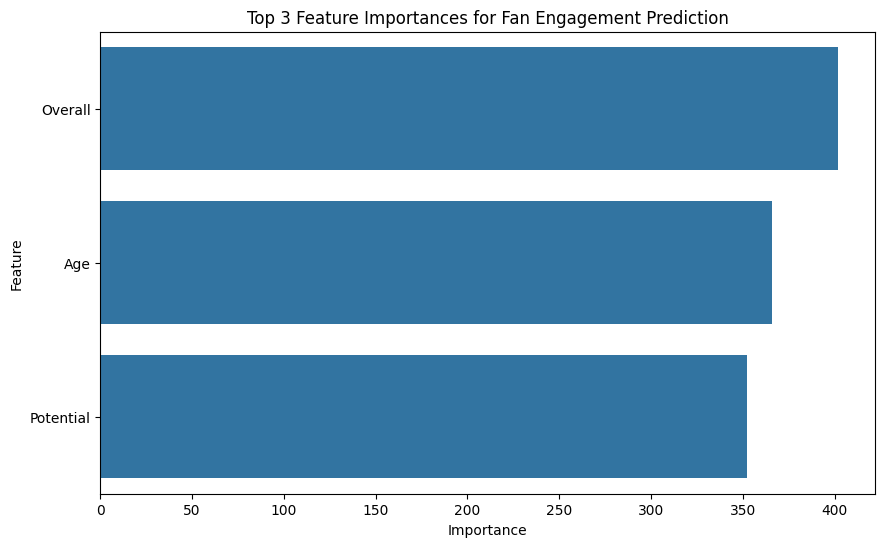

In [64]:
# Get feature importances from the best model (LightGBM)
importances = best_model.feature_importances_
feature_names = X_fan_engagement.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(3), x='Importance', y='Feature')
plt.title('Top 3 Feature Importances for Fan Engagement Prediction')
plt.show()


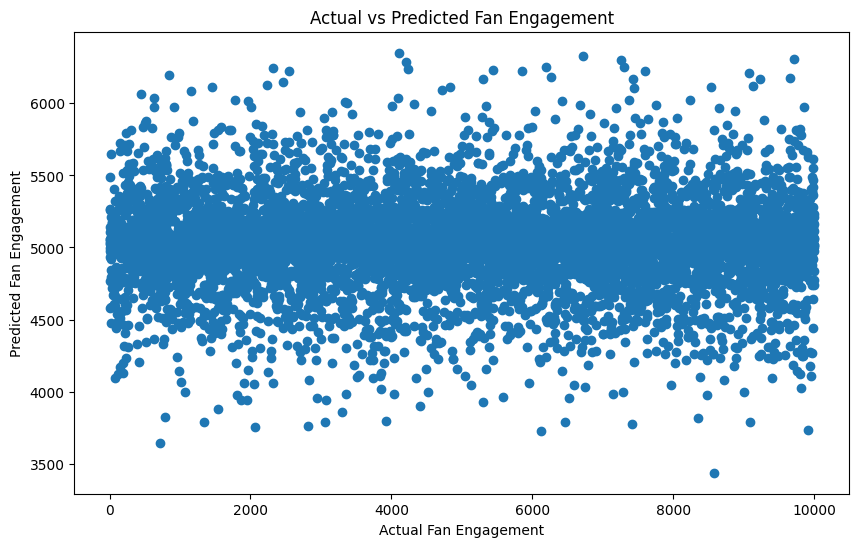

In [65]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fan, best_model.predict(X_test_fan))
plt.xlabel('Actual Fan Engagement')
plt.ylabel('Predicted Fan Engagement')
plt.title('Actual vs Predicted Fan Engagement')
plt.show()


END OF FAN ENGAGEMENT 

#####

TESTING SOMETHING HERE

I TRIED REFINING IT HERE AND REMOVING LIGHTGBM algorithm and put knn

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re



# Create a proxy for Fan Engagement (example: using weighted sum of some features)
df['Fan_Engagement'] = df['Overall'] * 0.4 + df['Potential'] * 0.3 + df['Skill Moves'] * 0.2 + df['Wage'] * 0.1

# Feature selection for fan engagement
features_fan_engagement = ['Overall', 'Potential', 'Skill Moves', 'Age']
X_fan_engagement = df[features_fan_engagement]
y_fan_engagement = df['Fan_Engagement']

# One-hot encode categorical features
X_fan_engagement = pd.get_dummies(X_fan_engagement)

# Train-test split
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X_fan_engagement, y_fan_engagement, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Model training and evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'XGBoost': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    mse = evaluate_model(model, X_train_fan, X_test_fan, y_train_fan, y_test_fan)
    results[name] = mse
    print(f"{name} MSE: {mse}")


Linear Regression MSE: 2867482.5185840437
Ridge MSE: 2867482.6274177926
Lasso MSE: 2867523.4444648665
XGBoost MSE: 1023681.7385228471
KNN MSE: 1185765.6186284383


the best was XGboost MSE

In [77]:
from sklearn.model_selection import GridSearchCV

# Smaller hyperparameter tuning grid for XGBoost
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_fan, y_train_fan)
best_model = grid_search.best_estimator_

print(f"Best parameters for XGBoost: {grid_search.best_params_}")
print(f"Best MSE for XGBoost: {-grid_search.best_score_}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best MSE for XGBoost: 1098609.6794846703


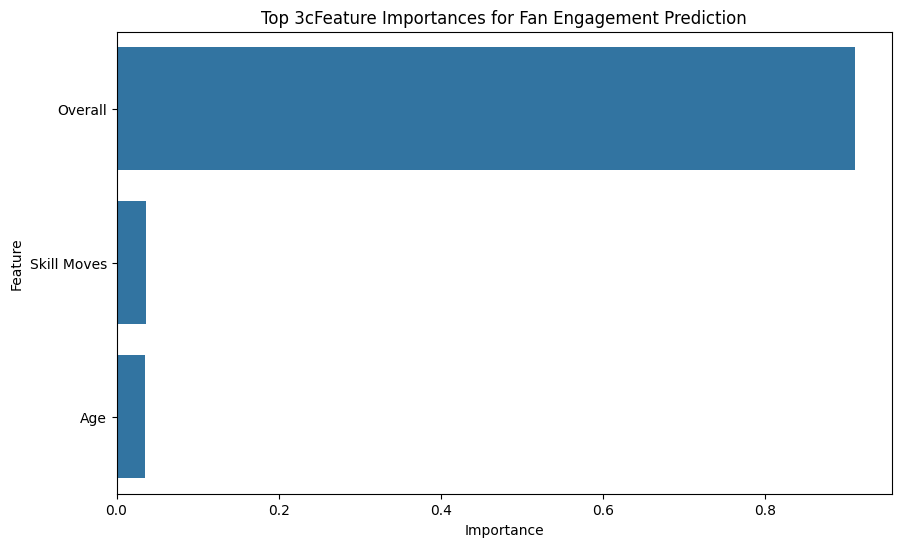

Cross-validation MSE: 1071956.5936106758


In [80]:
# Feature importance
importance = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_fan_engagement.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(3), x='Importance', y='Feature')
plt.title('Top 3cFeature Importances for Fan Engagement Prediction')
plt.show() 
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_fan_engagement, y_fan_engagement, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation MSE: {np.mean(-cv_scores)}')


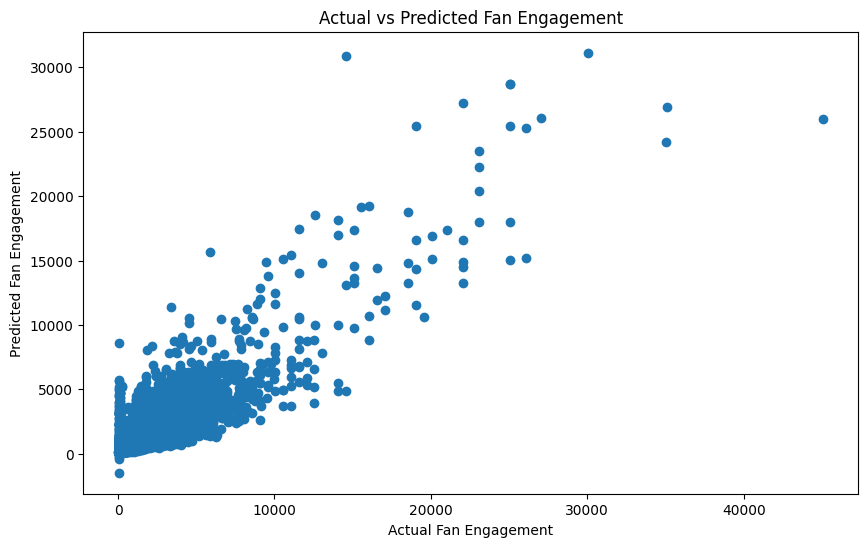

In [79]:
# Predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fan, best_model.predict(X_test_fan))
plt.xlabel('Actual Fan Engagement')
plt.ylabel('Predicted Fan Engagement')
plt.title('Actual vs Predicted Fan Engagement')
plt.show()


but i prefer the light gbm cause it showed something more reasonable than this one